# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Read in Cleaned Dataframe

df = pd.read_csv('./data/Final_dataset_Cleaned.csv')

In [3]:
# Drop unwanted column created during concatenation of dataframes

df = df.drop(['Unnamed: 0'], axis =1)

In [4]:
# Double check for null values

df.isnull().sum()

SEASON                    0
PLAYER_ID                 0
FIRST_NAME                0
LAST_NAME                 0
PLAYER_NAME               0
POSITION                  0
HEIGHT_W_SHOES            0
WEIGHT                    0
WINGSPAN                  0
STANDING_REACH            0
BODY_FAT_PCT              0
HAND_LENGTH               0
HAND_WIDTH                0
STANDING_VERTICAL_LEAP    0
MAX_VERTICAL_LEAP         0
LANE_AGILITY_TIME         0
College WS                0
dtype: int64

In [5]:
df.head()

,SEASON,PLAYER_ID,FIRST_NAME,LAST_NAME,PLAYER_NAME,POSITION,HEIGHT_W_SHOES,WEIGHT,WINGSPAN,STANDING_REACH,BODY_FAT_PCT,HAND_LENGTH,HAND_WIDTH,STANDING_VERTICAL_LEAP,MAX_VERTICAL_LEAP,LANE_AGILITY_TIME,College WS
0,2000,2124,malik,allen,Malik Allen,PF-C,82.118103,271.0,86.5,109.0,9.297541,9.235294,9.875000,25.500000,29.0,11.83,4.2
1,2000,12019,harold,arceneaux,Harold Arceneaux,SG-SF,78.064583,219.0,80.5,103.0,6.684507,8.636905,9.363095,29.761905,29.0,13.80,5.6
2,2000,12020,lamont,barnes,Lamont Barnes,PF-C,82.118103,235.5,87.5,108.0,9.297541,9.235294,9.875000,28.000000,29.5,12.30,5.2
3,2000,12131,mario,bland,Mario Bland,PF,81.066972,287.0,84.0,103.0,8.297265,8.996644,9.674497,27.000000,31.0,13.04,4.2
4,2000,2049,speedy,claxton,Speedy Claxton,PG,74.130693,166.0,72.0,94.5,6.420144,8.291353,8.971805,36.000000,42.5,10.48,7.0


In [6]:
df.shape

(1278, 17)

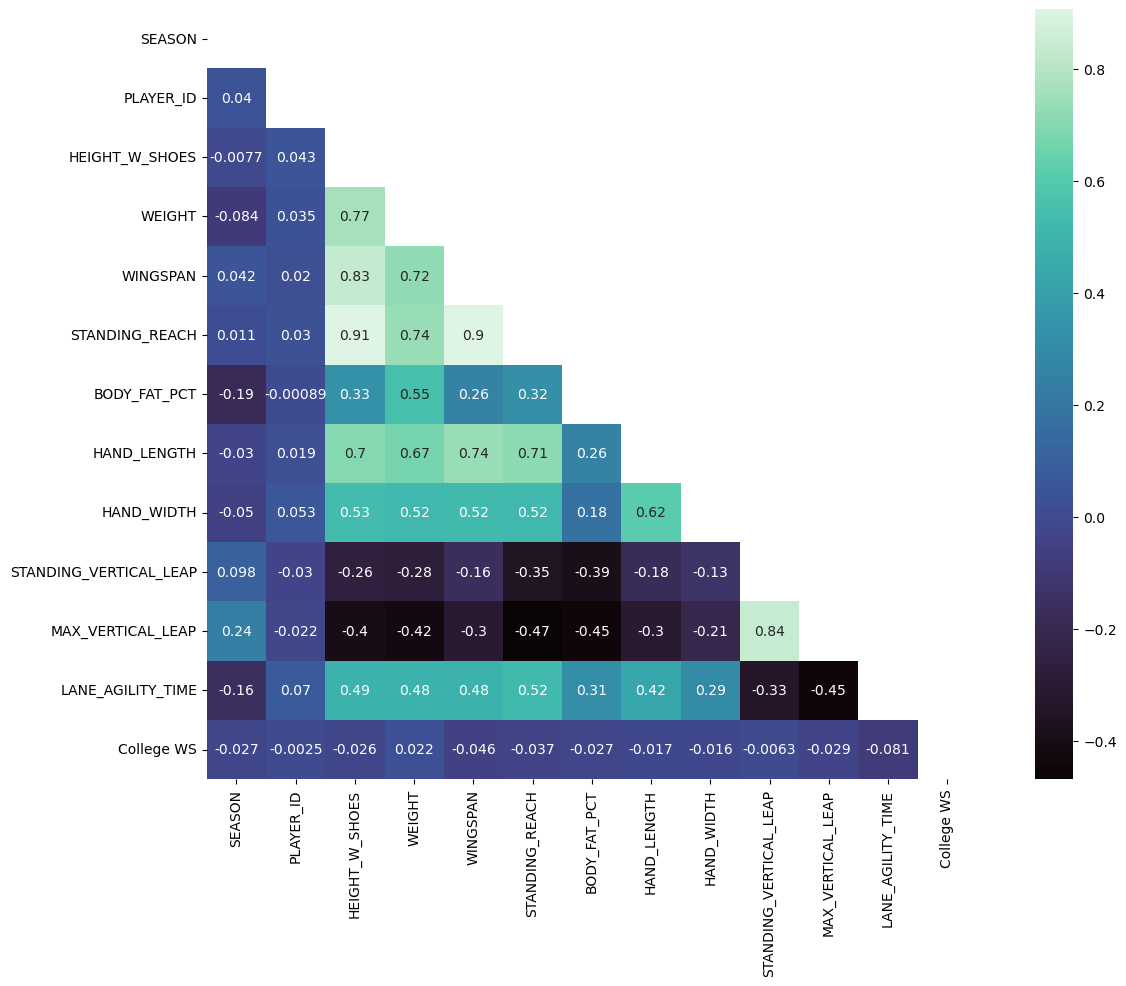

In [22]:
# corr looks at all pariwise corrletaion between columns and how they relate to one another
# This visuals helps me see that Hand Length, Height, and Wingspan may be correlated

# This code is taken with minor modifications from https://seaborn.pydata.org/generated/seaborn.heatmap.html

# Heat maps use color to show the strength of a relationship between two or more variables.

# Establish size of figure.
plt.figure(figsize=(15, 10))

# Get correlation of variables.
corr = df.corr()

# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Plot our correlation heatmap, while masking the upper triangle to be white.
sns.heatmap(corr,
            mask=mask,
            square=True,
            annot=True,
            cmap='mako');

In [21]:
# Look at datatypes per column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   SEASON                  1278 non-null   int64  
 1   PLAYER_ID               1278 non-null   int64  
 2   FIRST_NAME              1278 non-null   object 
 3   LAST_NAME               1278 non-null   object 
 4   PLAYER_NAME             1278 non-null   object 
 5   POSITION                1278 non-null   object 
 6   HEIGHT_W_SHOES          1278 non-null   float64
 7   WEIGHT                  1278 non-null   float64
 8   WINGSPAN                1278 non-null   float64
 9   STANDING_REACH          1278 non-null   float64
 10  BODY_FAT_PCT            1278 non-null   float64
 11  HAND_LENGTH             1278 non-null   float64
 12  HAND_WIDTH              1278 non-null   float64
 13  STANDING_VERTICAL_LEAP  1278 non-null   float64
 14  MAX_VERTICAL_LEAP       1278 non-null   

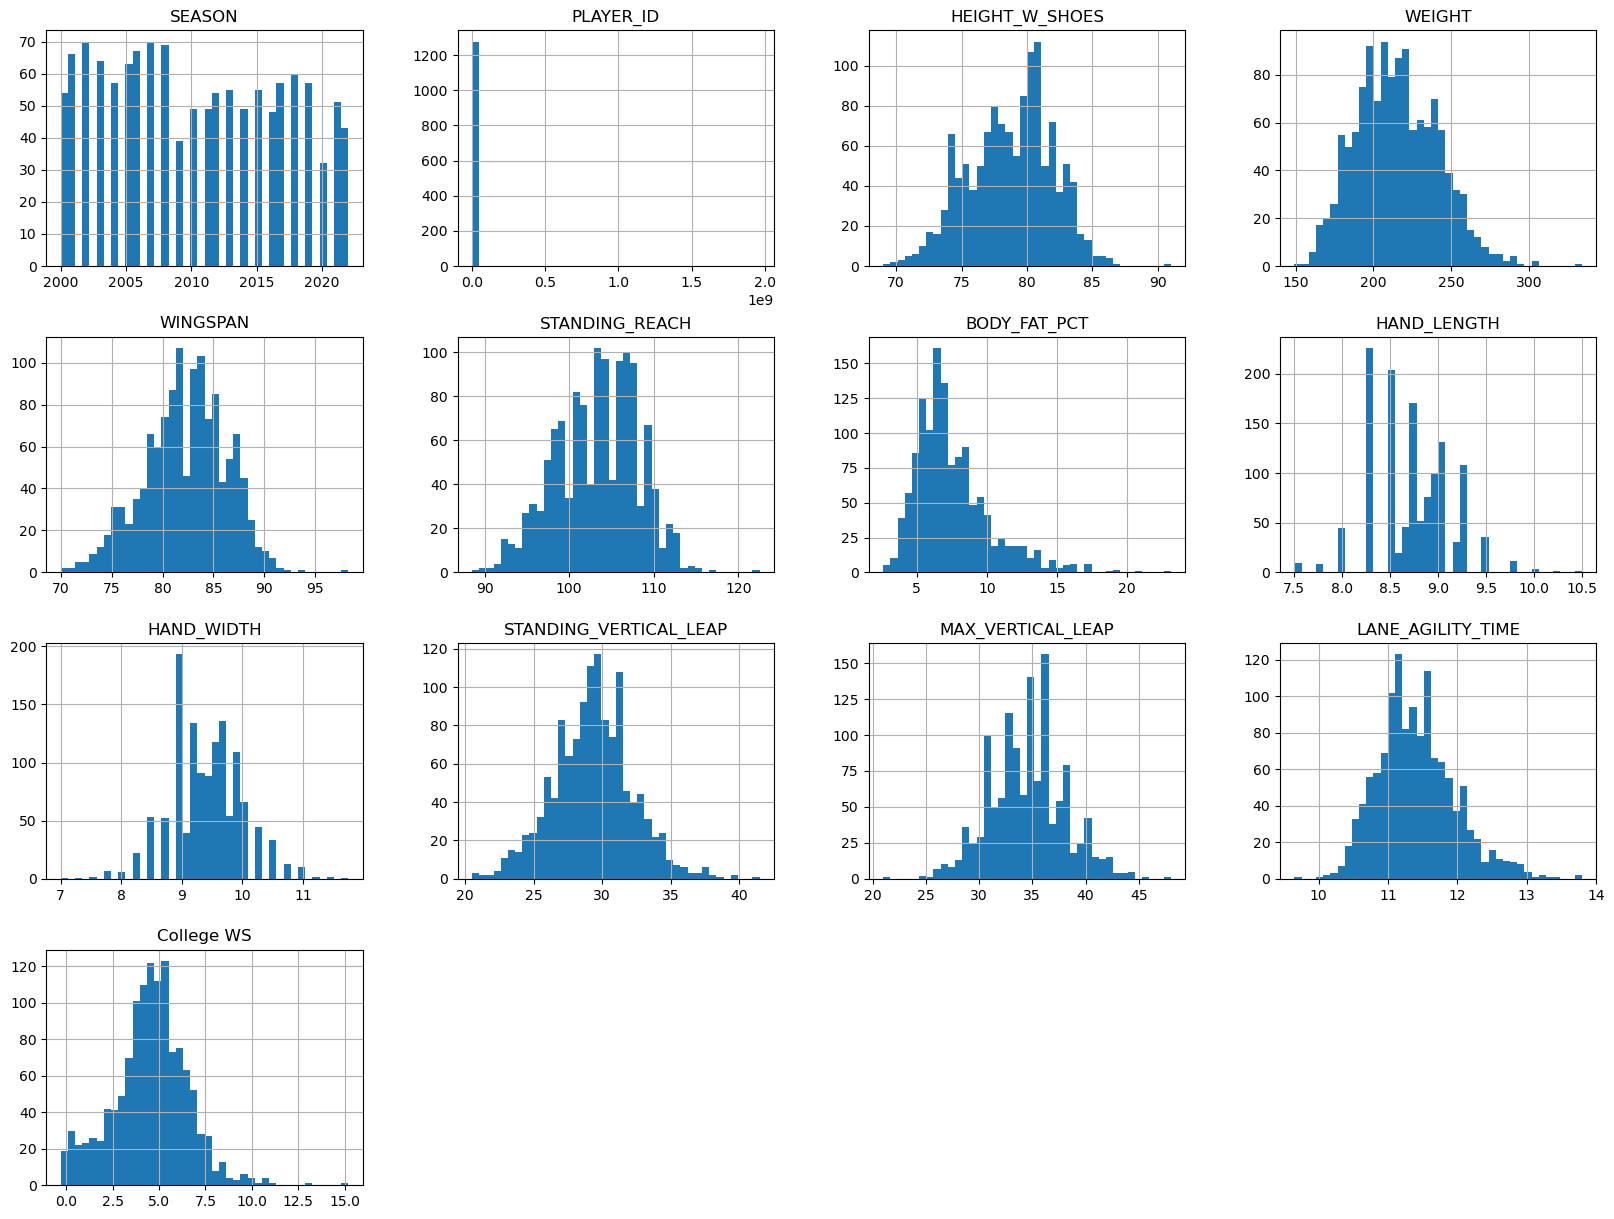

In [9]:
df.hist(bins=40, figsize=(20,15));

Things noticed from histograms:
    
• many histograms are close to normal distribution 

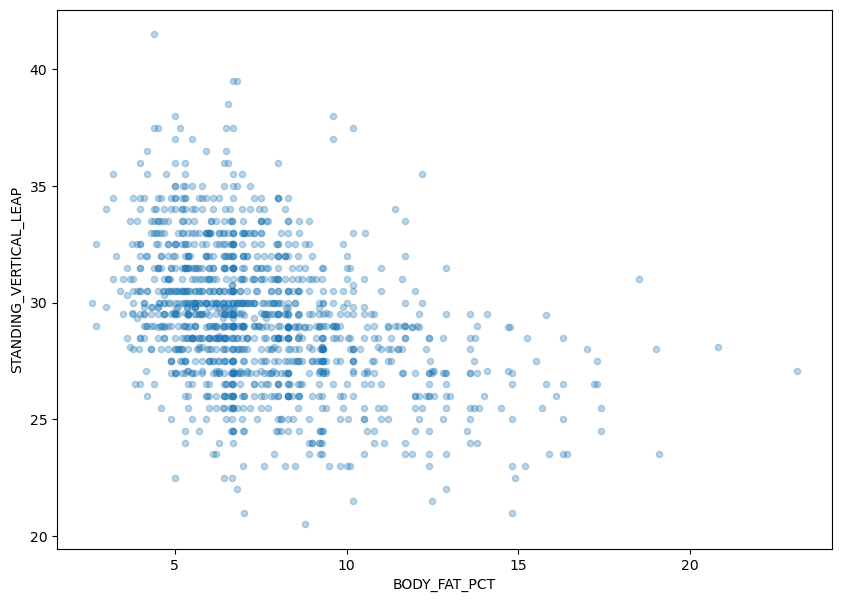

In [10]:
# plot of Body fat vs standing vertical of players

df.plot(kind='scatter', x='BODY_FAT_PCT', y='STANDING_VERTICAL_LEAP', alpha=0.3, figsize=(10,7));

Seems reasonable, the more body fat percentage will lead to a lower jump, in general

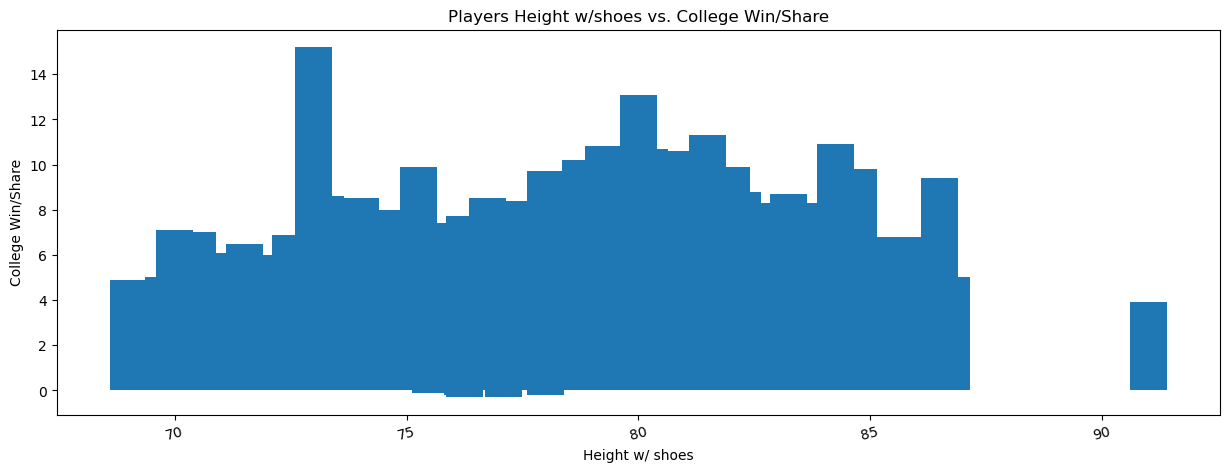

In [13]:
# Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals
# create a figure
plt.figure(figsize=(15, 5))

# bar chart
# cereal.plot(kind='bar')
plt.bar(x=df['HEIGHT_W_SHOES'],
        height=df['College WS'])

# fix x-axis labels
plt.xticks(rotation=15)


# create a descriptive title
plt.title(label='Players Height w/shoes vs. College Win/Share')

# label the axes
plt.xlabel('Height w/ shoes')
plt.ylabel('College Win/Share');

This shows that how height can affect a player's Win Share. It has a somewhat normail distribution with 80 inches being
the focal point of the normal curve.  This could show that players around 80 inches tall with shoes could be more beneficial.

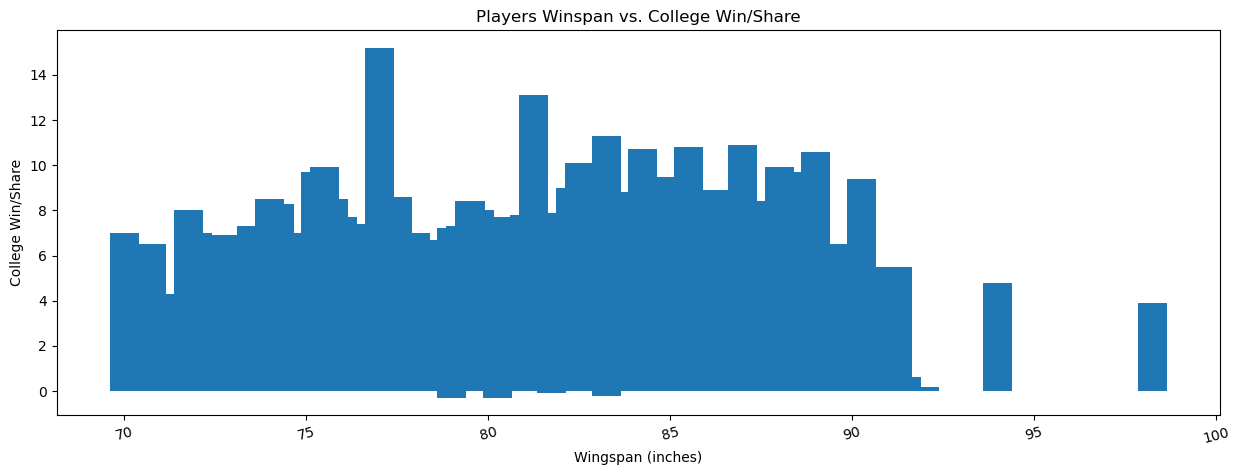

In [14]:
# Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals
# create a figure
plt.figure(figsize=(15, 5))

# bar chart
# cereal.plot(kind='bar')
plt.bar(x=df['WINGSPAN'],
        height=df['College WS'])

# fix x-axis labels
plt.xticks(rotation=15)


# create a descriptive title
plt.title(label='Players Winspan vs. College Win/Share')

# label the axes
plt.xlabel('Wingspan (inches)')
plt.ylabel('College Win/Share');

This looks at Wingspan compared to Win Share.  From here it is difficult to say the affect of Wingspan.

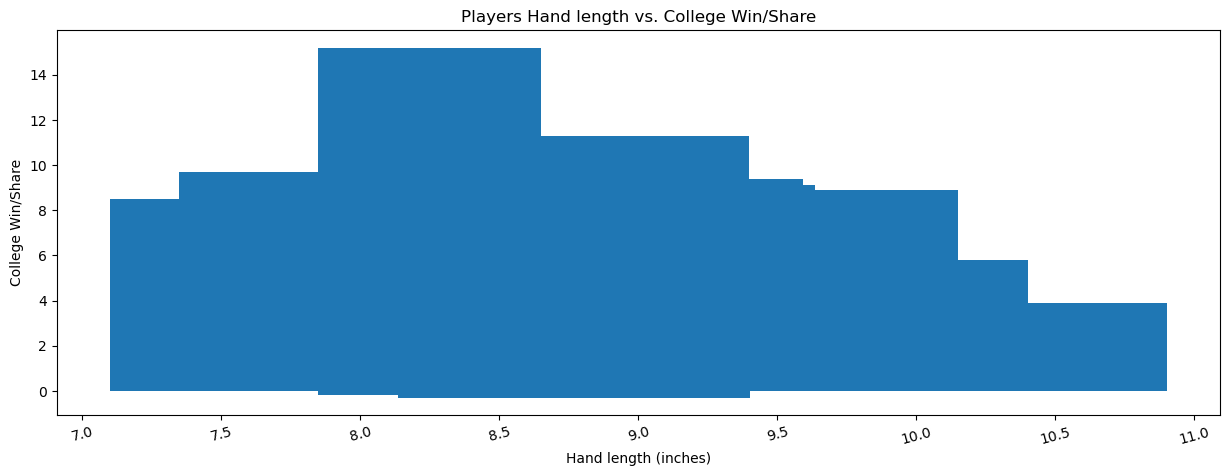

In [15]:
# Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals
# create a figure
plt.figure(figsize=(15, 5))

# bar chart
# cereal.plot(kind='bar')
plt.bar(x=df['HAND_LENGTH'],
        height=df['College WS'])

# fix x-axis labels
plt.xticks(rotation=15)


# create a descriptive title
plt.title(label='Players Hand length vs. College Win/Share')

# label the axes
plt.xlabel('Hand length (inches)')
plt.ylabel('College Win/Share');

This shows that hand length's from 8 - 8.5 inches could be an optimal length. Potentially.

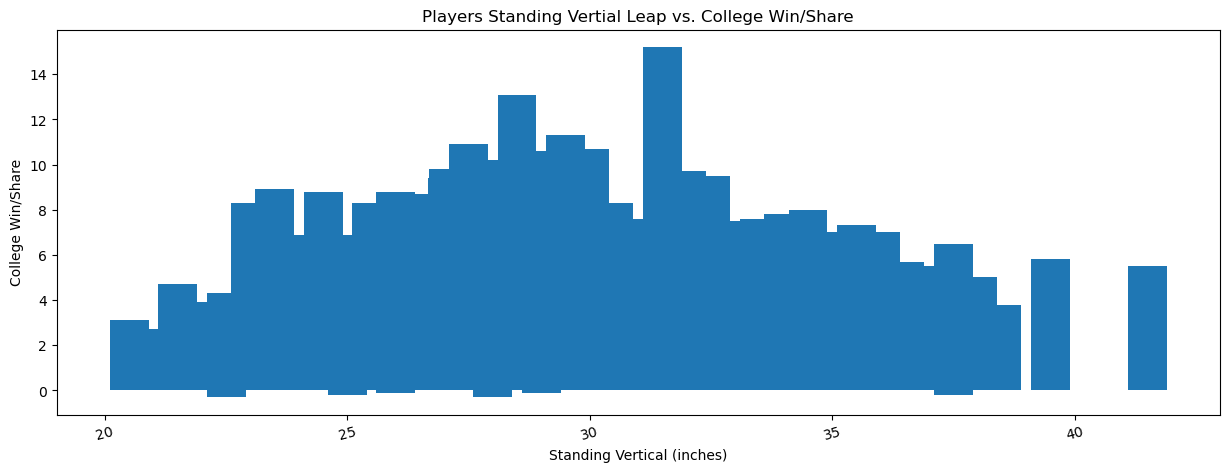

In [16]:
# Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals
# create a figure
plt.figure(figsize=(15, 5))

# bar chart
# cereal.plot(kind='bar')
plt.bar(x=df['STANDING_VERTICAL_LEAP'],
        height=df['College WS'])

# fix x-axis labels
plt.xticks(rotation=15)


# create a descriptive title
plt.title(label='Players Standing Vertial Leap vs. College Win/Share')

# label the axes
plt.xlabel('Standing Vertical (inches)')
plt.ylabel('College Win/Share');

This shows that the vertical leap of a player can somewhat alter the winshare of a player.  Shows some normal distribution,
qualities as well.

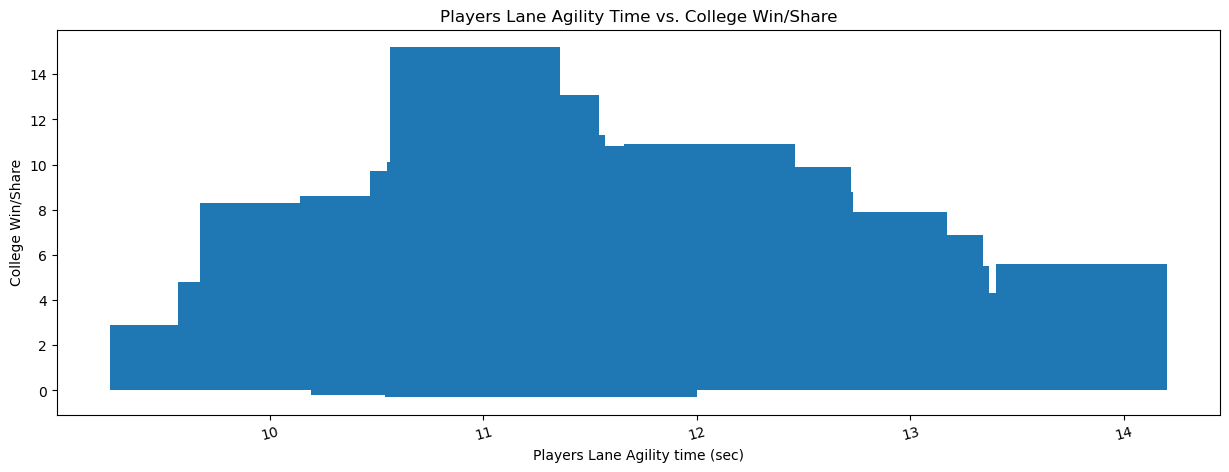

In [17]:
# Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals
# create a figure
plt.figure(figsize=(15, 5))

# bar chart
# cereal.plot(kind='bar')
plt.bar(x=df['LANE_AGILITY_TIME'],
        height=df['College WS'])

# fix x-axis labels
plt.xticks(rotation=15)


# create a descriptive title
plt.title(label='Players Lane Agility Time vs. College Win/Share')

# label the axes
plt.xlabel('Players Lane Agility time (sec)')
plt.ylabel('College Win/Share');

In general faster could be better but is their an optimal time?  It seem players between 10.5 - 11.5 seconds could
produce a higher win share

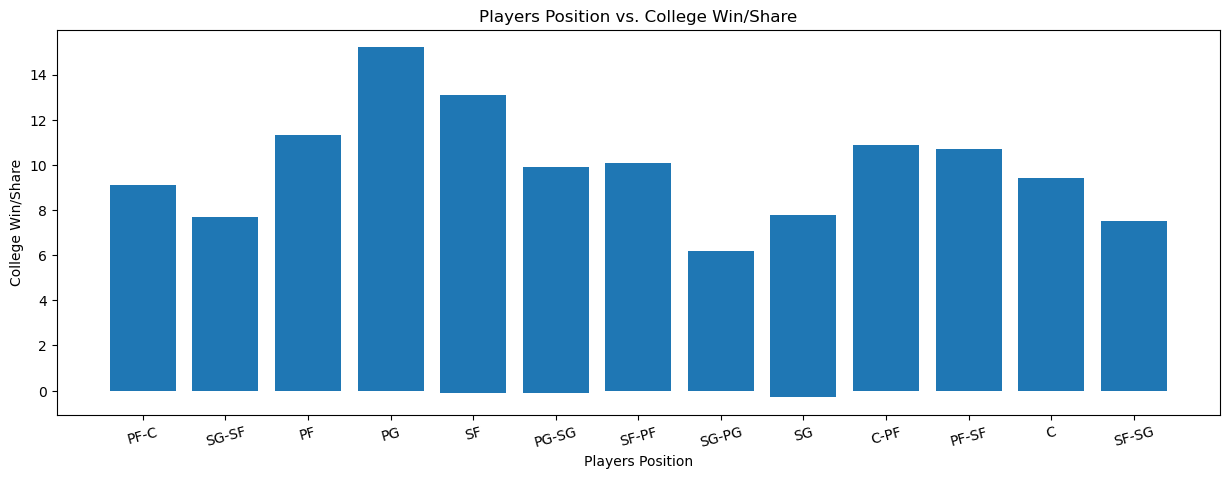

In [18]:
# Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals
# create a figure
plt.figure(figsize=(15, 5))

# bar chart
# cereal.plot(kind='bar')
plt.bar(x=df['POSITION'],
        height=df['College WS'])

# fix x-axis labels
plt.xticks(rotation=15)


# create a descriptive title
plt.title(label='Players Position vs. College Win/Share')

# label the axes
plt.xlabel('Players Position')
plt.ylabel('College Win/Share');

This looks at each position and the win share.  It seems pg is a position that bring more value to a team

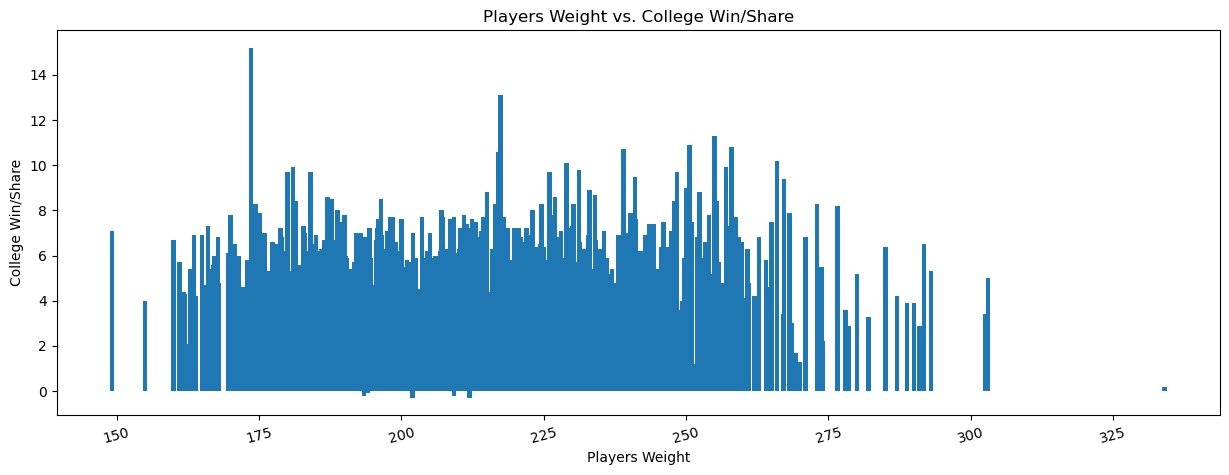

In [19]:
# Plot it! Let's use a bar chart to visualize the top 10 most sugary cereals
# create a figure
plt.figure(figsize=(15, 5))

# bar chart
# cereal.plot(kind='bar')
plt.bar(x=df['WEIGHT'],
        height=df['College WS'])

# fix x-axis labels
plt.xticks(rotation=15)


# create a descriptive title
plt.title(label='Players Weight vs. College Win/Share')

# label the axes
plt.xlabel('Players Weight')
plt.ylabel('College Win/Share');

This shows how weight could affect a player's win share.  In general there is a slight increase in win share with weight.
This could be an interesting factor to look into.